# `DATA PREPROCESSING AND EXPLORATION`
# **TOPIC: FILMS ANALYSIS**
`Group ID`: 17

`Group Member`:
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

## **OBJECTIVES**

In this phase, the goal is to ensure the dataset is clean and ready for analysis:
- Understand column meanings and data types.
- Check for inappropriate data types or inconsistencies.
- Analyze value distributions to detect patterns or issues.
- Identify and address missing or invalid values.

## **IMPLEMENTATION WITH EXPLANATION**

### **SETUP AND IMPORTS**

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### **DATA EXPLORATION**

#### **Read data**

The `films_data.csv` file is read and its content is loaded into a pandas DataFrame, preparing for exploration and preprocessing.

In [23]:
file = open('films_data.csv', 'r', encoding='utf-8-sig')

data = {}
first_line = file.readline().strip().split('\t')
for val in first_line:
    data[val] = []

for line in file:
    line_vals = line.strip().split('\t')   
    for i in range(len(line_vals)):
        data[first_line[i]].append(line_vals[i])
        
data_df = pd.DataFrame(data)

data_df.head(5)

,Rank,Title,Foreign %,Domestic %,Year,Genre,Director,Writer,Cast
0,1,Avatar,73.1%,26.9%,2009,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,2,Avengers: Endgame,69.3%,30.7%,2019,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely, Stan Lee,...","Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,3,Avatar: The Way of Water,70.5%,29.5%,2022,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,"James Cameron, Rick Jaffa, Amanda Silver, Jame...","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
3,4,Titanic,70.2%,29.8%,1997,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K..."
4,5,Star Wars: Episode VII - The Force Awakens,54.8%,45.2%,2015,"Action, Adventure, Sci-Fi",J.J. Abrams,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...","Daisy Ridley, John Boyega, Oscar Isaac, Domhna..."


#### **Meaning of each row**
Each row represents a specific movie, detailing information about its release, performance, genre, and key contributors (director, writer, and cast).

In [24]:
n_row, n_col = data_df.shape
print('Number of rows:', n_row)

Number of rows: 1000


### **Meaning of each column**
- `Ranks`: The film's rank in the top lifetime grosses.
- `Titles`: The film's name.
- `Foreign %`: The percentage of the foreign grosses in the film's worldwide grosses.
- `Domestic %`: The percentage of the domestic grosses in the film's worldwide grosses.
- `Years`: The year that the film was first released.
- `Genres`: The genre(s) associated with each film.
- `Directors`: The director(s) of each film.
- `Writers`: The writer(s) credited for each film.
- `Casts`: The main cast members of each film.

In [25]:
print('Number of columns:', n_col)

Number of columns: 9


### **Datatype of each column**

In [26]:
data_df.dtypes

Rank          object
Title         object
Foreign %     object
Domestic %    object
Year          object
Genre         object
Director      object
Writer        object
Cast          object
dtype: object

### **DATA PREPROCESSING**

This step ensures the proper data types for numerical columns and restructures text-based columns (Genre, Director, Writer, Cast) into lists, making the data more suitable for further analysis:
- Convert percentage columns: Convert `Foreign %` and `Domestic %` to numeric values by removing the '%' symbol and changing the data type to floats. If the value in these columns is '-', it indicates that the foreign gross accounts for 100% of the film's worldwide grosses, and the domestic gross is considered 0%.

- Split genres: Split the values in `Genre` into separate columns or lists for better analysis of each genre individually.

- `Director` and `Writer` parsing: If needed, split multiple directors or writers into lists to analyze individual contributions.

- `Cast` parsing: Similarly, parse the `Cast` column into individual actor names or convert to lists, which will make it easier to analyze actor appearances across movies.

In [27]:
data_df['Rank'] = data_df['Rank'].str.replace(',', '').astype(int)

data_df['Foreign %'] = data_df['Foreign %'].str.rstrip('%').astype(float)

data_df['Domestic %'] = data_df['Domestic %'].apply(
    lambda x: float(x.replace('<', '').rstrip('%')) if x != '-' else 0.0
)

data_df['Genre'] = data_df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

data_df['Director'] = data_df['Director'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

data_df['Writer'] = data_df['Writer'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

data_df['Cast'] = data_df['Cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


### **New datatype of each column**

In [28]:
data_df.dtypes

Rank            int64
Title          object
Foreign %     float64
Domestic %    float64
Year           object
Genre          object
Director       object
Writer         object
Cast           object
dtype: object

### **Check duplicated data**

This step identifies and handles duplicate rows in the dataset by:
- Normalize Data: Converts all text to lowercase, removes extra spaces, and sorts lists for consistency across rows.
- Check for Duplicates: Applies normalization and checks for duplicate rows using the duplicated method.
- Handle Duplicates:
    - If duplicates are found:
        + Counts the number of duplicate rows.
        + Extracts and displays all duplicate rows for inspection.
    - If no duplicates are found, it confirms the dataset has no duplicate data.

In [29]:
def normalize_data(row):
    return row.apply(
        lambda x: str(sorted([str(v).strip().lower() for v in x])) if isinstance(x, list) 
        else str(x).strip().lower()
    )

normalized_df = data_df.apply(normalize_data, axis=1)

num_duplicated_rows = normalized_df.duplicated().sum()

if num_duplicated_rows > 0:
    duplicates = data_df[normalized_df.duplicated(keep=False)]
    print(f"The raw data has {num_duplicated_rows} duplicated rows.")
    print("Duplicated rows:")
    print(duplicates)
else:
    print("No duplicated data found.")

No duplicated data found.


### **Check missing data**

This step identifies and calculates the proportion of missing or empty data in the dataset to assess its impact on analysis and determine if further cleaning is needed:
- Find rows with empty errays: Detects rows containing empty arrays (['']) in any column.
- Count Missing Values: Counts the total number of empty arrays in the dataset.
- Calculate Missing Ratio: Computes the percentage of missing data relative to the total number of elements (excluding NaN values).
- Display Results: Prints the missing data ratio and shows rows with empty arrays for inspection.

In [30]:
rows_with_empty_arrays = data_df[data_df.apply(lambda row: row.apply(lambda x: x == ['']).any(), axis=1)]

missing_count = data_df.applymap(lambda x: x == ['']).sum().sum()  

total_elements = data_df.size - data_df.isna().sum().sum()  

missing_ratio = (missing_count / total_elements) * 100

print(f"Missing ratio: {missing_ratio:.4f}")  
print("Rows with missing data:")
rows_with_empty_arrays

Missing ratio: 0.0222
Rows with missing data:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_39760\1827069712.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_count = data_df.applymap(lambda x: x == ['']).sum().sum()


,Rank,Title,Foreign %,Domestic %,Year,Genre,Director,Writer,Cast
642,643,This Is It,73.1,26.9,2009,"[Documentary, Music]",[Kenny Ortega],[],"[Michael Jackson, Alex Al, Alexandra Apjarova,..."
660,661,Taylor Swift: The Eras Tour,30.9,69.1,2023,"[Documentary, Music, Musical]",[Sam Wrench],[],"[Taylor Swift, Mike Meadows, Max Bernstein, Pa..."


There's no duplicated data, but the missing ratio of all columns is 0.02%. We have to handle the missing data. The missing ratio is quite small, but it can affects the data accuracy if we delete the missing rows or fill them with "Unknown" tag. Therefore, a better way to handle them is to fill them with specific data entries for better accuracy in analysis, as these information can be easily found on the Internet.

In [31]:
data_df.loc[data_df['Title'] == "Taylor Swift: The Eras Tour", 'Writer'] = ["[Sam Wrench]"]
data_df.loc[data_df['Title'] == "This Is It", 'Writer'] = ["[Kenny Ortega]"]

data_df[data_df['Title'].isin(["Taylor Swift: The Eras Tour", "This Is It"])]

,Rank,Title,Foreign %,Domestic %,Year,Genre,Director,Writer,Cast
642,643,This Is It,73.1,26.9,2009,"[Documentary, Music]",[Kenny Ortega],[Kenny Ortega],"[Michael Jackson, Alex Al, Alexandra Apjarova,..."
660,661,Taylor Swift: The Eras Tour,30.9,69.1,2023,"[Documentary, Music, Musical]",[Sam Wrench],[Sam Wrench],"[Taylor Swift, Mike Meadows, Max Bernstein, Pa..."


### **DATA DISTRIBUTION**

#### **For numeric columns**

To analyze the distribution of numeric columns in the dataset:
- Select numeric columns.
- Calculate key statistics
    - Minimum (min): Smallest value in each column.
    - Lower Quartile (Q1): 25th percentile value in each column.
    - Median: Middle value (50th percentile) in each column.
    - Upper Quartile (Q3): 75th percentile value in each column.
    - Maximum (max): Largest value in each column.
- Compiles these statistics into a DataFrame, rounding values for clarity.

This will provide a comprehensive view of the range and distribution of numeric data, helping identify trends, outliers, or skewness in the data.

In [32]:
numeric_cols = data_df.select_dtypes(include='number')

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

def median(col):
  return col.median()
min_vals = numeric_cols.min()
max_vals = numeric_cols.max()
lower_quartile_vals = numeric_cols.apply(lower_quartile)
median_vals = numeric_cols.apply(median)
upper_quartile_vals = numeric_cols.apply(upper_quartile)

num_col_info_df = pd.DataFrame({
    "min": min_vals,
    "lower_quartile": lower_quartile_vals,
    "median": median_vals,
    "upper_quartile": upper_quartile_vals,
    "max": max_vals
}).T

num_col_info_df = num_col_info_df.round(1)
num_col_info_df

,Rank,Foreign %,Domestic %
min,1.0,13.2,0.0
lower_quartile,250.8,51.1,30.6
median,500.5,60.5,39.5
upper_quartile,750.2,69.4,48.9
max,1000.0,100.0,86.8


Here, we visualize the distribution of numeric data.

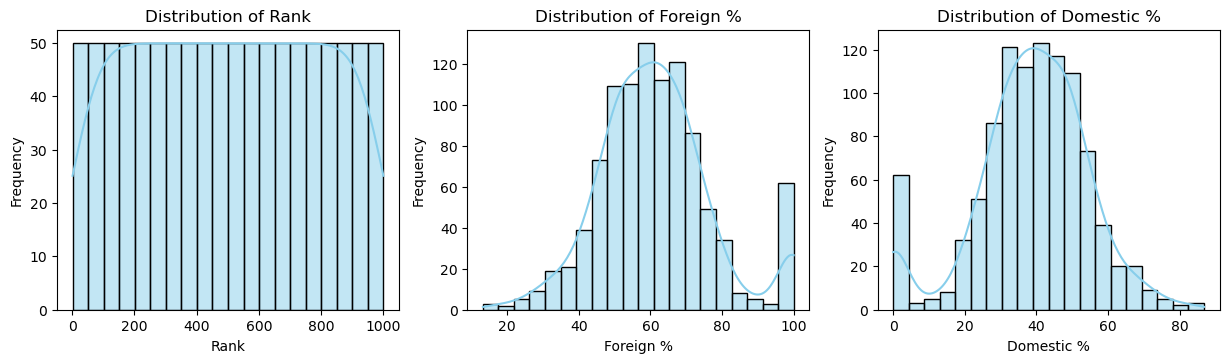

In [33]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(2, len(numeric_cols.columns), i + 1)
    sns.histplot(data_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

There are some insights that can be gained from the histograms:
- Skewness: The `Foreign %` distribution appears right-skewed, with most movies having a substantial foreign share of the gross, but a few films pushing the foreign percentage to the maximum. The `Domestic %` distribution likely has a left-skew, with most films having lower domestic earnings.
- Outliers: There may be some outliers, particularly in the `Foreign %` column, where certain films could have nearly all their earnings from international markets (close to 100%).
- Data imbalance: The domestic earnings seem to be less dominant in many films, with several having very low or zero domestic percentages. This could indicate a trend of international popularity for films in the dataset.

#### **For non-numeric columns**

To analyze the distribution of non-numeric columns, we follow these steps.

- Here, set display options for better clarity in output.

In [34]:
pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.max_columns', None) 

- Then, identify the number of unique values `num_values` in each categorical column and calculates the percentage of occurrences `value_ratios` for each distinct value.

In [35]:
cat_col_info = {}

for col in data_df.select_dtypes(exclude='number').columns:
    non_missing_values = data_df[col].dropna()
    non_missing_values = non_missing_values.apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
    if data_df[col].dtype.name == 'category' or data_df[col].dtype == 'object':  # Categorical columns
        num_values = non_missing_values.nunique()

    value_counts = non_missing_values.value_counts(normalize=True) * 100
    value_ratios = value_counts.to_dict()

    cat_col_info[col] = {
        'num_values': num_values,
        'value_ratios': value_ratios
    }

cat_col_info_df = pd.DataFrame(cat_col_info).T
cat_col_info_df['value_ratios'] = cat_col_info_df['value_ratios'].apply(lambda x: {k: round(v, 1) for k, v in x.items()})
cat_col_info_df

,num_values,value_ratios
Title,988,"{'The Jungle Book': 0.2, 'The Lion King': 0.2, 'Beauty and the Beast': 0.2, 'The Little Mermaid'..."
Year,55,"{'2019': 4.9, '2017': 4.9, '2016': 4.8, '2018': 4.7, '2014': 4.5, '2013': 4.3, '2012': 4.2, '201..."
Genre,343,"{'Action,Adventure,Sci-Fi': 6.4, 'Action,Adventure,Thriller': 3.1, 'Action,Adventure,Sci-Fi,Thri..."
Director,535,"{'Steven Spielberg': 2.2, 'Tim Burton': 1.0, 'Ridley Scott': 1.0, 'Robert Zemeckis': 1.0, 'Micha..."
Writer,931,"{'M. Night Shyamalan': 0.6, 'Steve Kloves,J.K. Rowling': 0.4, 'Nancy Meyers': 0.4, 'Melissa Rose..."
Cast,980,"{'Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving': 0.3, 'Vin Diesel,Paul Walker,M..."


As can be seen, the dataset consists of diverse values in these categorical columns, with a few entries being notably more common than others. For example, the most common genre combination is 'Action, Adventure, Sci-Fi', which makes up 6.4% of the films and the most common directors are Steven Spielberg, who makes up 2.2%.

For the column `title`, in top 1000, there are some films with the same names. This can be explained as the films are remade by another crew and they can be considered as different films.

#### **Check constraints**

This step checks the consistency of the `Foreign %` and `Domestic %` columns in the dataset.

- Check if the sum of `Foreign %` and `Domestic %` equals 100 for each row.

In [36]:
def checking_grosses(df: pd.DataFrame) -> bool:
    consistency_check = (df['Foreign %'] + df['Domestic %'] == 100)

    return consistency_check.all()

checking_grosses(data_df) == True

np.False_

- Calculate the total discrepancy in the dataset where the sum of `Foreign %` and `Domestic %` does not equal 100.

In [37]:
sum(100 - (data_df["Foreign %"] + data_df["Domestic %"]))

-0.4999999999999716

- To follow the constraint, correct the `Domestic %` by setting it to 100 - `Foreign %`.

In [38]:
data_df['Domestic %'] = 100 - data_df['Foreign %']

-  Recheck the constraint again to ensure the data is now correct.

In [39]:
checking_grosses(data_df) == True

np.True_

### **Save cleaned data**

The cleaned `data_df` is then saved as "cleaned_data.csv" for further analysis.

In [40]:
def saveDataFrame2CSV(df: pd.DataFrame, save_path: str, sep: str = ',', encoding: str = 'utf-8') -> bool:
    try:
        df.to_csv(save_path, sep=sep, encoding=encoding, index=False)
    except:
        raise ModuleNotFoundError
        # return False
    return True

In [41]:
save_name = "cleaned_data.csv"
saveDataFrame2CSV(data_df, os.path.join("./", f"{save_name}"))

True